Find Players with low potentials but high actual Rating
- Label Players has a potential higher than 83 but never reaches this potential

In [295]:
HYPERTRAINING = True
CV = 5
PLAYER_ATTRIBUTES = [ 'central','winger','offense','Finishing',  'ShortPassing', 'Volleys', 'Dribbling',  'FKAccuracy', 'LongPassing', 'BallControl',
                      'Acceleration', 'SprintSpeed', 'Agility',    'Reactions', 'Balance', 
                      'ShotPower', 'Jumping',  'LongShots', 'Positioning', 'Vision' ]
# PLAYER_ATTRIBUTES = [ 'Age' ,'Dribbling',  'FKAccuracy',  'BallControl','ShotPower','Positioning', 'Penalties' ]
PLAYER_ATTRIBUTES = [  'central','offense','Age','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                      'Acceleration', 'SprintSpeed', 'Agility', 'GKPositioning', 'GKReflexes', 'Composure', 'Defensive awareness', 'Reactions', 'Balance', 
                      'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Marking', 
                      'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking']
PLAYER_ATTRIBUTES = [   'Stamina','HeadingAccuracy', 'BallControl', 'Reactions','Jumping', 'Strength',  'Aggression', 'Interceptions', 'StandingTackle', 'SlidingTackle','Defense','Acceleration', 'SprintSpeed', 'Agility']
# PLAYER_ATTRIBUTES = [ 'Acceleration', 'SprintSpeed', 'Agility',    'Reactions', 'Balance',  'Jumping', 'Stamina', 'Strength',  'Aggression', 'Positioning', 'Vision']
PREDICTION_NAME = "Defense"

In [296]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")
find_and_append_module_path()
os.getcwd()

from src.sport_analytics.model.prepare import add_features_raw_datadf_raw

New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


### Get Data

In [297]:
sql_prime = """
SELECT max(Age) as prime_age,* FROM(SELECT MAX(Overall) AS PrimeOverall,*
  FROM fifa
  GROUP BY ID ) 
  GROUP BY ID
  order by PrimeOverall DESC;
"""

sql_potentials = f"""
SELECT min(Age) as potential_age,* FROM  (SELECT *,Potential as max_potential FROM fifa WHERE Potential>84)
GROUP BY ID
order by potential DESC;
"""



In [298]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df_potentials = pd.read_sql_query(sql_potentials, conn)
df_prime = pd.read_sql_query(sql_prime, conn)

conn.close()

df_potentials = df_potentials.set_index(['ID'])
df_prime = df_prime.set_index(['ID'])

df_raw = df_potentials.join(df_prime[["prime_age","PrimeOverall"]])
df_raw = df_raw.reset_index(['ID'])
df_raw = add_features_raw_datadf_raw(df_raw)

df_raw.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,,,potential_age,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Position,Unnamed: 0,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Composure,Defensive awareness,max_potential,prime_age,PrimeOverall,best_position,central,winger,offense,Defense,overall_age_ratio,youth_player,age_based_Reactions,age_based_Stamina,age_based_Positioning,age_based_Vision,age_based_Finishing,age_based_BallControl
ID,Name,FIFA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,2011,23.0,23.0,https://cdn.sofifa.net/players/158/023/11_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,90.0,95.0,FC Barcelona,https://cdn.sofifa.net/meta/team/83/30.png,€0,€0,2121.0,"RW,RF,ST,CAM",11360.0,85.0,91.0,69.0,89.0,88.0,97.0,87.0,82.0,75.0,96.0,94.0,88.0,96.0,89.0,86.0,79.0,64.0,75.0,59.0,87.0,48.0,22.0,90.0,91.0,86.0,13.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0,NaN,NaN,95.0,24.0,94.0,RW,0,1,1.0,13.0,0.170132,False,12.340000,0.040000,26.380000,19.140000,30.320000,23.140000
20801,Cristiano Ronaldo,2011,25.0,25.0,https://cdn.sofifa.net/players/020/801/11_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,89.0,94.0,Real Madrid,https://cdn.sofifa.net/meta/team/3468/30.png,€0,€0,2223.0,"RW,CAM,LW,ST",11359.0,84.0,89.0,87.0,81.0,85.0,93.0,88.0,88.0,71.0,95.0,93.0,94.0,94.0,88.0,84.0,93.0,91.0,85.0,80.0,91.0,61.0,24.0,88.0,80.0,82.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,NaN,NaN,94.0,31.0,94.0,RW,0,1,1.0,22.0,0.142400,False,10.272727,10.090909,25.606061,7.333333,30.212121,22.757576
244778,Trincão,2021,20.0,20.0,https://cdn.sofifa.net/players/244/778/21_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,78.0,91.0,FC Barcelona,https://cdn.sofifa.net/meta/team/83/30.png,€34M,€105K,1911.0,"RW,LW,CAM",12092.0,69.0,73.0,66.0,71.0,66.0,85.0,84.0,56.0,67.0,83.0,81.0,78.0,83.0,79.0,67.0,74.0,63.0,77.0,71.0,74.0,53.0,32.0,74.0,75.0,67.0,NaN,34.0,32.0,5.0,9.0,6.0,15.0,7.0,84.0,35.0,91.0,20.0,78.0,RW,0,1,1.0,35.0,0.195000,False,4.923077,4.538462,5.538462,4.538462,11.153846,5.769231
183277,E. Hazard,2011,19.0,19.0,https://cdn.sofifa.net/players/183/277/11_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,81.0,91.0,LOSC Lille,https://cdn.sofifa.net/meta/team/690/30.png,€0,€0,1958.0,"RW,LW,CF,RM",11226.0,74.0,76.0,64.0,80.0,67.0,84.0,68.0,64.0,68.0,86.0,87.0,86.0,83.0,78.0,76.0,72.0,67.0,74.0,56.0,74.0,54.0,42.0,80.0,82.0,75.0,35.0,32.0,29.0,11.0,12.0,6.0,8.0,8.0,NaN,NaN,91.0,27.0,91.0,RW,0,1,1.0,35.0,0.224377,True,6.950000,5.200000,15.850000,16.600000,14.800000,13.300000
243812,Rodrygo,2021,19.0,19.0,https://cdn.sofifa.net/players/243/812/21_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,79.0,90.0,Real Madrid,https://cdn.sofifa.net/meta/team/3468/30.png,€38M,€90K,1929.0,"RW,LW",12571.0,72.0,78.0,62.0,73.0,67.0,84.0,80.0,73.0,57.0,80.0,88.0,86.0,87.0,78.0,85.0,71.0,73.0,81.0,45.0,71.0,54.0,21.0,83.0,71.0,74.0,NaN,36.0,32.0,9.0,8.0,12.0,8.0,5.0,82.0,25.0,90.0,21.0,81.0,RW,0,1,1.0,25.0,0.218837,True,10.571429,10.857143,20.000000,7.071429,19.071429,6.000000


In [299]:
df = df_raw.copy()

year_to_category = {2011: 'drop', 2012: 'train', 2013: 'train', 2014: 'train', 2015: 'train', 2016: 'train', 2017: 'train', 2018: 'train', 2019: 'test', 2020: 'test', 2021: 'test', 2022: 'valid', 2023: 'valid', 2024: 'valid'}
df['set'] = df.index.get_level_values('FIFA').values
# Apply the mapping to the "FIFA" column
df['set'] = df['set'].map(year_to_category)

df_potentials = df[(df.set=="valid")&(df.Overall<83)&(df.Age<26)&(df.Potential>83)]

In [300]:

df = df[df.prime_age>df.potential_age]
df['target'] = df.PrimeOverall>82
df = df[df.potential_age<26]
df = df[(df.offense<-0.5)&(df.offense >-2)]
print(df.target.value_counts())


df_processed = df.copy()
df_processed.head()

target
False    117
True      69
Name: count, dtype: int64


,,,potential_age,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Position,Unnamed: 0,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Composure,Defensive awareness,max_potential,prime_age,PrimeOverall,best_position,central,winger,offense,Defense,overall_age_ratio,youth_player,age_based_Reactions,age_based_Stamina,age_based_Positioning,age_based_Vision,age_based_Finishing,age_based_BallControl,set,target
ID,Name,FIFA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
225508,E. Bailly,2017,22.0,22.0,https://cdn.sofifa.net/players/225/508/17_60.png,Côte d'Ivoire,https://cdn.sofifa.net/flags/ci.png,82.0,90.0,Manchester United,https://cdn.sofifa.net/meta/team/14/30.png,€26M,€100K,1822.0,CB,17251.0,41.0,33.0,74.0,71.0,36.0,52.0,42.0,43.0,56.0,63.0,79.0,83.0,67.0,74.0,65.0,55.0,84.0,81.0,82.0,48.0,86.0,84.0,36.0,35.0,46.0,82.0,83.0,86.0,14.0,14.0,10.0,9.0,8.0,43.0,NaN,90.0,23.0,84.0,CB,1,0,-1.0,82.0,0.169421,False,-1.304348,7.826087,-29.043478,-29.043478,-23.869565,-8.782609,train,True
138956,G. Chiellini,2011,25.0,25.0,https://cdn.sofifa.net/players/138/956/11_60.png,Italy,https://cdn.sofifa.net/flags/it.png,85.0,90.0,Juventus,https://cdn.sofifa.net/meta/team/625/30.png,€0,€0,1999.0,"CB,LB,LWB",11326.0,68.0,41.0,87.0,65.0,46.0,33.0,39.0,46.0,67.0,57.0,77.0,81.0,70.0,80.0,86.0,82.0,85.0,78.0,86.0,72.0,85.0,90.0,35.0,66.0,54.0,90.0,90.0,91.0,7.0,13.0,11.0,12.0,9.0,NaN,NaN,90.0,32.0,89.0,CB,1,0,-1.0,90.0,0.136000,False,2.272727,3.090909,-27.393939,-6.666667,-17.787879,-15.242424,drop,True
235243,M. de Ligt,2018,17.0,17.0,https://cdn.sofifa.net/players/235/243/18_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,76.0,89.0,Ajax,https://cdn.sofifa.net/meta/team/629/30.png,€11.5M,€8K,1854.0,CB,12471.0,47.0,44.0,78.0,71.0,40.0,67.0,48.0,55.0,69.0,72.0,62.0,67.0,60.0,72.0,44.0,83.0,80.0,74.0,83.0,62.0,74.0,70.0,44.0,66.0,40.0,75.0,77.0,74.0,12.0,11.0,11.0,12.0,10.0,67.0,NaN,89.0,23.0,86.0,CB,1,0,-1.0,75.0,0.262976,True,16.000000,24.600000,-1.200000,13.200000,-1.200000,12.800000,train,True
207865,Marquinhos,2014,19.0,19.0,https://cdn.sofifa.net/players/207/865/14_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,78.0,89.0,Paris Saint Germain,https://cdn.sofifa.net/meta/team/591/30.png,€5M,€60K,1748.0,"CB,RB",10078.0,50.0,33.0,76.0,69.0,31.0,55.0,40.0,32.0,70.0,72.0,78.0,78.0,70.0,77.0,65.0,53.0,77.0,75.0,60.0,31.0,78.0,80.0,27.0,42.0,31.0,84.0,83.0,84.0,6.0,6.0,12.0,10.0,13.0,NaN,NaN,89.0,28.0,88.0,CB,1,0,-1.0,84.0,0.216066,True,3.250000,1.500000,-32.250000,-22.750000,-24.000000,-7.000000,train,True
247263,E. Tapsoba,2021,21.0,21.0,https://cdn.sofifa.net/players/247/263/21_60.png,Burkina Faso,https://cdn.sofifa.net/flags/bf.png,78.0,88.0,Bayer 04 Leverkusen,https://cdn.sofifa.net/meta/team/3321/30.png,€29.5M,€38K,1847.0,CB,12618.0,39.0,54.0,77.0,80.0,33.0,61.0,46.0,32.0,74.0,62.0,71.0,76.0,65.0,77.0,62.0,74.0,75.0,74.0,79.0,30.0,82.0,76.0,27.0,59.0,77.0,NaN,81.0,76.0,5.0,10.0,13.0,7.0,15.0,76.0,78.0,88.0,22.0,81.0,CB,1,0,-1.0,78.0,0.176871,False,3.714286,6.571429,-29.857143,-3.285714,2.000000,-3.428571,test,False


In [301]:
df_processed.best_position.value_counts()

best_position
CB    120
LB     36
RB     30
Name: count, dtype: int64

In [302]:
df[["potential_age","Age","prime_age","max_potential","Potential","Overall","PrimeOverall","target","set","best_position"]].head()

,,,potential_age,Age,prime_age,max_potential,Potential,Overall,PrimeOverall,target,set,best_position
ID,Name,FIFA,,,,,,,,,,
225508,E. Bailly,2017,22.0,22.0,23.0,90.0,90.0,82.0,84.0,True,train,CB
138956,G. Chiellini,2011,25.0,25.0,32.0,90.0,90.0,85.0,89.0,True,drop,CB
235243,M. de Ligt,2018,17.0,17.0,23.0,89.0,89.0,76.0,86.0,True,train,CB
207865,Marquinhos,2014,19.0,19.0,28.0,89.0,89.0,78.0,88.0,True,train,CB
247263,E. Tapsoba,2021,21.0,21.0,22.0,88.0,88.0,78.0,81.0,False,test,CB


In [303]:
# if True:
#     df = df[[any(pos in i for pos in ['CF', 'LW', 'ST', 'RW']) for i in df['Position']]]
#     df.shape
# else:
#     select_position = lambda x: x in ["ST","CF","LW","RW"]
#     df["select"] = df['Position'].apply(select_position)
#     df = df[df["select"]]
#     df.shape

## Deskriptive Analyse

In [304]:
df.select_dtypes(exclude='object').corr()['target'].round(2).sort_values().head(100)

youth_player            -0.23
overall_age_ratio       -0.19
GKHandling              -0.09
winger                  -0.03
age_based_Positioning   -0.03
age_based_Stamina       -0.03
age_based_Vision        -0.02
GKReflexes              -0.02
GKDiving                -0.01
GKPositioning            0.01
central                  0.03
Composure                0.04
Positioning              0.04
Vision                   0.05
Acceleration             0.06
Crossing                 0.06
Agility                  0.06
SprintSpeed              0.07
Curve                    0.09
age_based_BallControl    0.09
Balance                  0.12
age_based_Reactions      0.13
age_based_Finishing      0.13
Dribbling                0.13
Unnamed: 0               0.14
Stamina                  0.14
Strength                 0.15
GKKicking                0.16
Aggression               0.18
Finishing                0.19
BallControl              0.20
Volleys                  0.21
Penalties                0.21
Potential 

In [305]:
df[df.Age<20].describe().round(0).compare(df[df.Age>=20].describe().round(0))

potential_age          Age        Overall        Potential         \
               self  other  self  other    self  other      self  other   
count          52.0  134.0  52.0  134.0    52.0  134.0      52.0  134.0   
mean           18.0   22.0  18.0   22.0    71.0   78.0       NaN    NaN   
std             1.0    2.0   1.0    2.0     4.0    3.0       NaN    NaN   
min            17.0   20.0  17.0   20.0     NaN    NaN       NaN    NaN   
25%            18.0   21.0  18.0   21.0    68.0   76.0       NaN    NaN   
50%            19.0   22.0  19.0   22.0    71.0   78.0       NaN    NaN   
75%            19.0   23.0  19.0   23.0    74.0   80.0       NaN    NaN   
max            19.0   25.0  19.0   25.0    78.0   85.0      89.0   91.0   

      Special         Unnamed: 0          Crossing        Finishing         \
         self   other       self    other     self  other      self  other   
count    52.0   134.0       52.0    134.0     52.0  134.0      52.0  134.0   
mean   1691.0  1876.0     9291.0  11665.0     51.0   59.0      34.0   42.0   
std     152.0   169.0     2387.0   1969.0      NaN    NaN      11.0   14.0   
min    1341.0  1389.0     3115.0   3540.0      NaN    NaN      17.0   10.0   
25%    1575.0  1740.0     8118.0  10470.0     34.0   47.0      26.0   30.0   
50%    1707.0  1882.0     9772.0  11195.0     56.0   60.0      31.0   42.0   
75%    1780.0  2006.0    10746.0  12336.0     64.0   75.0      41.0   54.0   
max    2032.0  2229.0    13481.0  17251.0     83.0   87.0      58.0   76.0   

      HeadingAccuracy        ShortPassing        Volleys        Dribbling  \
                 self  other         self  other    self  other      self   
count            52.0  134.0         52.0  134.0    52.0  134.0      52.0   
mean             66.0   73.0         66.0   72.0    34.0   42.0      57.0   
std               7.0    9.0          NaN    NaN     9.0   13.0      15.0   
min              50.0   43.0         41.0   36.0    11.0   14.0      13.0   
25%              60.0   68.0         62.0   68.0    29.0   32.0      48.0   
50%              67.0   74.0         68.0   73.0    34.0   41.0      60.0   
75%              72.0   78.0         70.0   76.0    40.0   52.0      69.0   
max              80.0   89.0         76.0   85.0    62.0   70.0      78.0   

             Curve        FKAccuracy        LongPassing        BallControl  \
       other  self  other       self  other        self  other        self   
count  134.0  52.0  134.0       52.0  134.0        52.0  134.0        52.0   
mean    63.0  44.0   52.0       39.0   42.0        58.0   66.0        64.0   
std     14.0  14.0   17.0       12.0   16.0        10.0    9.0         9.0   
min     20.0  21.0   20.0       22.0   10.0        32.0   33.0        40.0   
25%     52.0  32.0   38.0        NaN    NaN        53.0   62.0        60.0   
50%     65.0  42.0   50.0       36.0   40.0        58.0   67.0        66.0   
75%     75.0  54.0   69.0       44.0   53.0        66.0   72.0        71.0   
max     84.0  75.0   84.0       74.0   83.0        76.0   84.0        75.0   

             Acceleration        SprintSpeed        Agility        Reactions  \
       other         self  other        self  other    self  other      self   
count  134.0         52.0  134.0        52.0  134.0    52.0  134.0      52.0   
mean    70.0         71.0   74.0        73.0   76.0    63.0   67.0      66.0   
std      8.0          NaN    NaN         8.0    9.0     NaN    NaN       6.0   
min     48.0         51.0   45.0        55.0   45.0     NaN    NaN      52.0   
25%     66.0         66.0   68.0        68.0   70.0    56.0   60.0      64.0   
50%     71.0         70.0   75.0        70.0   76.0    65.0   67.0      67.0   
75%     76.0         77.0   81.0        80.0   83.0    71.0   75.0      70.0   
max     85.0         92.0   96.0        90.0   94.0    88.0   90.0      77.0   

             Balance        ShotPower        Jumping        Stamina         \
       other    self  other      self  othe

In [306]:
df[df.target].describe().round(3)
pd.set_option('display.max_columns', 3000)
bool_age = df.Age == 20
df[df.target&bool_age].describe().round(3).compare(df[~df.target&bool_age].describe().round(0))



potential_age         Age       Overall       Potential         Special  \
               self other  self other    self other      self other      self   
count          10.0  20.0  10.0  20.0  10.000  20.0    10.000  20.0    10.000   
mean            NaN   NaN   NaN   NaN  77.300  75.0    86.300  86.0  1839.800   
std             NaN   NaN   NaN   NaN   2.452   4.0     0.949   1.0   175.427   
min             NaN   NaN   NaN   NaN  73.000  60.0       NaN   NaN  1617.000   
25%             NaN   NaN   NaN   NaN  75.500  75.0    86.000  85.0  1676.250   
50%             NaN   NaN   NaN   NaN  77.500  76.0       NaN   NaN  1848.000   
75%             NaN   NaN   NaN   NaN  78.750  77.0       NaN   NaN  1992.750   
max             NaN   NaN   NaN   NaN  81.000  79.0       NaN   NaN  2100.000   

              Unnamed: 0          Crossing       Finishing        \
        other       self    other     self other      self other   
count    20.0     10.000     20.0    10.00  20.0    10.000  20.0   
mean   1789.0  12309.800  11006.0    57.20  55.0    43.000  35.0   
std     159.0   2822.227   2108.0    17.37  17.0    12.193  10.0   
min    1389.0   9883.000   3540.0    35.00  27.0    20.000  21.0   
25%    1683.0  10211.750  10094.0    47.00  40.0    36.250  29.0   
50%    1834.0  10742.500  11864.0    53.00  54.0    41.000  33.0   
75%    1903.0  14806.500  12371.0    73.00  71.0    49.750  44.0   
max    1989.0  16713.000  13194.0    83.00  79.0    61.000  58.0   

      HeadingAccuracy       ShortPassing       Volleys       Dribbling        \
                 self other         self other    self other      self other   
count          10.000  20.0       10.000  20.0  10.000  20.0    10.000  20.0   
mean           70.600  68.0       70.700  69.0  40.200  38.0    62.400  61.0   
std             9.571  10.0        6.378  10.0  15.069  10.0    14.269  17.0   
min            52.000  43.0       59.000  36.0  23.000  20.0    41.000  27.0   
25%            65.250  65.0       67.250  64.0  26.250  30.0    51.750  51.0   
50%            74.000  70.0       73.000  71.0     NaN   NaN    63.000  68.0   
75%            75.750  75.0       73.750  75.0  51.750  44.0    74.000  75.0   
max            85.000  82.0       79.000  80.0  66.000  56.0       NaN   NaN   

        Curve       FKAccuracy       LongPassing       BallControl        \
         self other       self other        self other        self other   
count  10.000  20.0     10.000  20.0      10.000  20.0      10.000  20.0   
mean   51.900  51.0     43.700  38.0      66.500  60.0      69.200  69.0   
std    17.013  17.0     17.455  10.0       7.605  10.0       7.657   7.0   
min    32.000  28.0     22.000  23.0      57.000  33.0      53.000  48.0   
25%    36.500  40.0        NaN   NaN      59.500  56.0      66.250  66.0   
50%    50.500  48.0     43.000  36.0      68.000  64.0      71.000  70.0   
75%    63.000  68.0     52.750  43.0      68.750  67.0      73.500  77.0   
max    79.000  78.0     80.000  60.0      81.000  74.0      79.000  78.0   

      Acceleration       SprintSpeed       Agility       Reactions        \
              self other        self other    self other      self other   
count       10.000  20.0      10.000  20.0  10.000  20.0    10.000  20.0   
mean        72.200  74.0      75.400  77.0  66.000  65.0    73.700  71.0   
std         11.468   8.0      10.362   9.0  12.055  12.0     6.075   5.0   
min            NaN   NaN      65.000  56.0  51.000  40.0    63.000  57.0   
25%         64.500  68.0      66.500  70.0  56.000  55.0    71.500  70.0   
50%         66.000  74.0      73.500  80.0  64.500  66.0    75.500  72.0   
75%         83.000  80.0      82.750  85.0  74.750  74.0    78.000  75.0   
max         90.000  89.0      93.000  88.0  84.000  88.0    80.000  79.0   

      Balance       ShotPower       Jumping       Stamina       Strength  \
         self other      self other    self other    self other     self   
count  10.000  20.0    10.000  20.0  10

###  Feature Engineering

#### Transform Defense Attributs

#### Transform Value

In [307]:
df_processed = df_processed.fillna(0)
df_potentials = df_potentials.fillna(0)

In [308]:
df['target'].value_counts()

target
False    117
True      69
Name: count, dtype: int64

In [309]:
X = df_processed.drop("target", axis=1, errors='ignore')
y = df['target']  # Use df_processed here instead of df
# Split the data into training and testing sets

In [310]:


from sklearn.model_selection import train_test_split
if False:
    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train[PLAYER_ATTRIBUTES]
    X_test = X_test[PLAYER_ATTRIBUTES]

else:

    X_train = X[X.set=="train"][PLAYER_ATTRIBUTES]
    y_train = y[X.set=="train"]

    X_test = X[X.set=="test"][PLAYER_ATTRIBUTES]
    y_test = y[X.set=="test"]


In [311]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
# Load your dataset or replace df_processed and df with your data
# df_processed = pd.read_csv('your_dataset.csv')

import pandas as pd

from sklearn.preprocessing import StandardScaler
# Step 2: Initialize a StandardScaler
scaler = StandardScaler()

# Step 3: Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_potentials_scaled = scaler.transform(df_potentials[PLAYER_ATTRIBUTES].fillna(0))

# Step 4: Create new DataFrames with the scaled data while preserving the index and columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=PLAYER_ATTRIBUTES)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=PLAYER_ATTRIBUTES)
df_potentials_scaled_df = pd.DataFrame(df_potentials_scaled, index=df_potentials.index, columns=PLAYER_ATTRIBUTES)

# Hyperparametertuning

In [312]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

if HYPERTRAINING:
    def objective(trial):
        # Define hyperparameters to optimize
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'max_depth': trial.suggest_int('max_depth', 1, 8),
            'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),  # Adjust the range
            'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),  # Adjust the range
            'max_features': trial.suggest_float('max_features', 0.1, 1.0),
            'criterion': 'gini',  # or 'entropy' depending on your problem
            'random_state': 42
        }

        # Implement cross-validation
        clf = RandomForestClassifier(**params)
        from sklearn.model_selection import StratifiedKFold
        cv = StratifiedKFold(n_splits=CV, shuffle=True, random_state=42)
        cv_scores = cross_val_score(clf, X_train_scaled_df, y_train, cv=cv, scoring='roc_auc')
        mean_auc = cv_scores.mean()

        return mean_auc

    # Create an Optuna study for maximizing AUC
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)  # You can increase n_trials for more optimization

    PARAMS_RF = study.best_params
    best_auc = study.best_value

    print("Best hyperparameters:", PARAMS_RF)
    print("Best AUC:", best_auc)
else:
    PARAMS_RF = {}

[I 2023-11-04 17:23:11,762] A new study created in memory with name: no-name-46ac7c7b-6c75-4dd8-9030-dd5337ee013b
[I 2023-11-04 17:23:13,856] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 276, 'max_depth': 1, 'min_samples_split': 0.8722503385232643, 'min_samples_leaf': 0.3667781216131478, 'max_features': 0.8545531370550479}. Best is trial 0 with value: 0.5.
[I 2023-11-04 17:23:16,887] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 439, 'max_depth': 3, 'min_samples_split': 0.8734663894970622, 'min_samples_leaf': 0.3763865812577757, 'max_features': 0.8820209979455178}. Best is trial 0 with value: 0.5.
[I 2023-11-04 17:23:18,050] Trial 2 finished with value: 0.7859375 and parameters: {'n_estimators': 101, 'max_depth': 1, 'min_samples_split': 0.3827808202682593, 'min_samples_leaf': 0.19282552927307203, 'max_features': 0.9529524432732397}. Best is trial 2 with value: 0.7859375.
[I 2023-11-04 17:23:20,178] Trial 3 finished with value: 0.7453125 and para

Best hyperparameters: {'n_estimators': 101, 'max_depth': 1, 'min_samples_split': 0.3827808202682593, 'min_samples_leaf': 0.19282552927307203, 'max_features': 0.9529524432732397}
Best AUC: 0.7859375


In [313]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

if False:
    def objective(trial):
        # Define hyperparameters to optimize
        params = {
            'max_depth': trial.suggest_int('max_depth', 1, 12),
            'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),  # Adjust the range
            'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),  # Adjust the range
            'max_features': trial.suggest_float('max_features', 0.1, 1.0),
            'criterion': 'gini',  # or 'entropy' depending on your problem
            'random_state': 42
        }

        # Create the Decision Tree classifier with the given hyperparameters
        clf = DecisionTreeClassifier(**params)

        # Implement cross-validation to calculate mean AUC
        cv_scores = cross_val_score(clf, X_train_scaled_df, y_train, cv=CV, scoring='roc_auc')
        mean_auc = cv_scores.mean()

        return mean_auc

    # Create an Optuna study for maximizing AUC
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)  # You can increase n_trials for more optimization

    PARAM_DT = study.best_params
    best_auc = study.best_value

    print("Best hyperparameters:", PARAM_DT)
    print("Best AUC:", best_auc)
else:
    PARAM_DT = {}

In [314]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


if HYPERTRAINING:
    def objective(trial):
        # Define hyperparameters to optimize
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 400),
            'max_depth': trial.suggest_int('max_depth', 1, 6),
            'min_child_weight': trial.suggest_float('min_child_weight', 5, 30),  # Adjust the range
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 2.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 2.0),
        }

        # Implement early stopping with cross-validation
        cv_scores = []

        clf = XGBClassifier(**params, random_state=42, n_jobs=-1)

        # Implement cross-validation to calculate mean AUC
        from sklearn.model_selection import StratifiedKFold
        cv = StratifiedKFold(n_splits=CV, shuffle=True, random_state=42)
        cv_scores = cross_val_score(clf, X_train_scaled_df, y_train, cv=cv, scoring='roc_auc')
        mean_auc = cv_scores.mean()

        return mean_auc
    # Create an Optuna study for maximizing AUC
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)  # You can increase n_trials for more optimization

    PARAM_XGB = study.best_params
    best_auc = study.best_value

    print("Best hyperparameters:", PARAM_XGB)
    print("Best AUC:", best_auc)
else:
    PARAM_XGB = {}


[I 2023-11-04 17:26:02,298] A new study created in memory with name: no-name-fa39c951-7d9d-47b6-bbc1-aa0e74532761
[I 2023-11-04 17:26:03,560] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 341, 'max_depth': 5, 'min_child_weight': 12.629170189514264, 'subsample': 0.5068832284066551, 'colsample_bytree': 0.8168733792503793, 'learning_rate': 0.25241701265575345, 'reg_alpha': 0.23315634536575658, 'reg_lambda': 1.1963695369120138}. Best is trial 0 with value: 0.5.
[I 2023-11-04 17:26:04,527] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 316, 'max_depth': 1, 'min_child_weight': 10.744208137783048, 'subsample': 0.5827914235240065, 'colsample_bytree': 0.9728525593472341, 'learning_rate': 0.27232751226382995, 'reg_alpha': 0.27788016186879094, 'reg_lambda': 0.6641323202864235}. Best is trial 0 with value: 0.5.
[I 2023-11-04 17:26:05,394] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 226, 'max_depth': 2, 'min_child_weight': 27.468226694228

Best hyperparameters: {'n_estimators': 279, 'max_depth': 3, 'min_child_weight': 6.841099732331879, 'subsample': 0.9385000184139685, 'colsample_bytree': 0.9138760028071342, 'learning_rate': 0.26900736476660836, 'reg_alpha': 0.11803538996845009, 'reg_lambda': 1.673504509689371}
Best AUC: 0.7640625


# FINAL Model RUN

In [315]:
import pandas as pd
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score
import xgboost as xgb
import lightgbm as lgb
import warnings
import shap 
import shap  # For SHAP values
import pickle

# Define class weights (if applicable)
class_weights = 'balanced'  # You can customize these weights if needed

# Create and train different classification models with class weights
models = {
    # 'Logistic Regression': LogisticRegression(class_weight=class_weights),
    # 'Decision Tree Classifier': DecisionTreeClassifier(class_weight=class_weights,** PARAM_DT),
    'Random Forest Classifier': RandomForestClassifier(class_weight=class_weights, ** PARAMS_RF),
    'XGBoost Classifier general': xgb.XGBClassifier(),
                                                                                     
    # 'Support Vector Classifier': SVC(class_weight=class_weights,probability=True,kernel='linear'),
    'XGBoost Classifier': xgb.XGBClassifier(**PARAM_XGB)
    # 'LightGBM Classifier': lgb.LGBMClassifier(** {'n_estimators': 100, 'max_depth': 7, 'min_child_samples': 7, 'subsample': 0.8090291881142198, 'colsample_bytree': 0.6278496311554949, 'learning_rate': 0.17976777947590364, 'reg_alpha': 0.6699371890412207, 'reg_lambda': 1.5295937299896694})
}

model_results = {}

for model_name, model in models.items():
    print(model_name,"training----->")
    model.fit(X_train_scaled_df, y_train)

    y_pred = model.predict(X_test_scaled_df)
    
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_scaled_df)[:, 1]
    else:
        y_prob = None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None
    
    precision = precision_score(y_test, y_pred)
    
    model_results[model_name] = {
        'Model': model,
        'Scaler':scaler,
        'attributes':PLAYER_ATTRIBUTES,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix,
        'AUC': auc,
        'Precision': precision
    }
if True:
    try:
        # Save SHAP values to a pickle file
        with open(f"data/sport_analytics/model/{PREDICTION_NAME}_trained_models.pkl", "wb") as file:
            pickle.dump(model_results, file)
    except:
        print("Fehler save Models",model_name)

# Evaluate and print results for each model
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['Accuracy']:.2f}")
    print("Classification Report:")
    print(results['Classification Report'])
    print("Confusion Matrix:")
    print(results['Confusion Matrix'])
    if results['AUC'] is not None:
        print(f"AUC: {results['AUC']:.2f}")
    if 'Precision' in results:
        print(f"Precision: {results['Precision']:.2f}")
    print()


Random Forest Classifier training----->
XGBoost Classifier general training----->
XGBoost Classifier training----->
Model: Random Forest Classifier
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.77      0.78        43
        True       0.38      0.40      0.39        15

    accuracy                           0.67        58
   macro avg       0.58      0.58      0.58        58
weighted avg       0.68      0.67      0.68        58

Confusion Matrix:
[[33 10]
 [ 9  6]]
AUC: 0.68
Precision: 0.38

Model: XGBoost Classifier general
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.86      0.81        43
        True       0.40      0.27      0.32        15

    accuracy                           0.71        58
   macro avg       0.59      0.56      0.57        58
weighted avg       0.67      0.71      0.69        58

Confusion Matrix:
[[37  

# evaluate Model

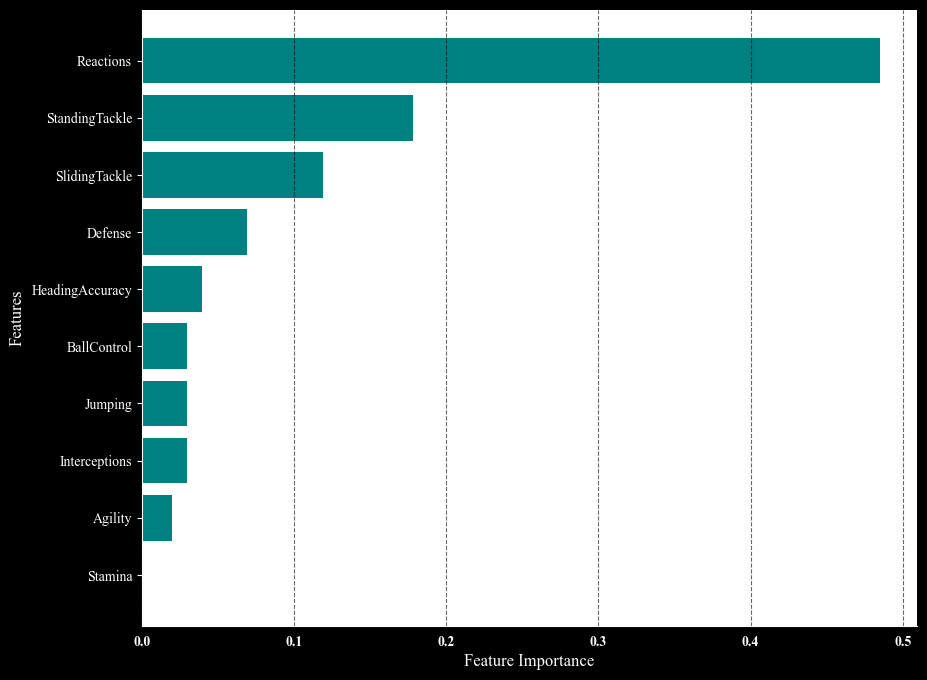

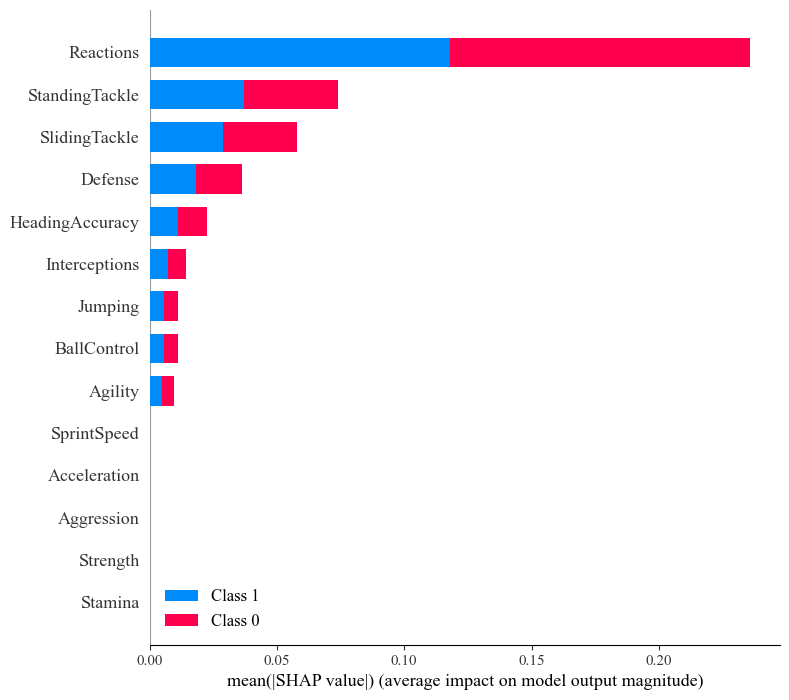

['Reactions',
 'StandingTackle',
 'SlidingTackle',
 'Defense',
 'HeadingAccuracy',
 'BallControl',
 'Jumping',
 'Interceptions',
 'Agility',
 'Stamina']

In [316]:
my_model = model_results['Random Forest Classifier']['Model']


from src.sport_analytics.model.eval import individual_shap_valuess,plot_feature_importance

features = plot_feature_importance(my_model, '')
explainer = shap.Explainer(my_model)
shap_values = explainer.shap_values(X_test_scaled_df)
shap.summary_plot(shap_values, X_test_scaled_df)

features



In [317]:
true_positives = (my_model.predict_proba(X_test_scaled_df)[:,1]>0.5)&(y_test)
X_test_scaled_df[true_positives]

,,,Stamina,HeadingAccuracy,BallControl,Reactions,Jumping,Strength,Aggression,Interceptions,StandingTackle,SlidingTackle,Defense,Acceleration,SprintSpeed,Agility
ID,Name,FIFA,,,,,,,,,,,,,,
229237,M. Akanji,2019,0.240182,0.294194,0.693684,0.755063,0.329888,0.335401,-0.940586,-0.240733,0.454547,0.389733,0.554376,0.324395,0.802775,0.319345
226851,B. Pavard,2019,0.114597,0.164878,0.914338,0.590919,1.251846,-0.530151,-0.296349,1.191727,0.249102,0.561045,1.104169,-0.390806,-0.302595,0.235583
235212,A. Hakimi,2020,1.244864,-0.998965,1.134993,0.590919,-0.592070,-0.406500,-0.940586,-0.081571,-0.367233,-1.152069,-0.545212,1.754796,1.908145,0.821922
216267,A. Robertson,2019,1.747205,-1.257596,0.914338,0.755063,-1.629272,-1.024752,0.476735,0.555078,0.249102,0.047111,0.187846,1.141767,1.244923,1.324498
200458,L. Digne,2020,1.370450,-0.093754,1.576303,1.575783,1.943314,-0.901101,0.219041,0.873402,0.865438,1.074979,0.187846,0.630909,0.250090,0.319345
220651,Angeliño,2021,1.621620,-1.645544,1.355648,0.755063,-0.246336,-1.766653,0.476735,0.395916,-0.367233,-0.638135,-0.361948,1.346110,-1.407965,0.905685


In [318]:
false_positives = (my_model.predict_proba(X_test_scaled_df)[:,1]>0.5)&(~y_test)
X_test_scaled_df[false_positives]



,,,Stamina,HeadingAccuracy,BallControl,Reactions,Jumping,Strength,Aggression,Interceptions,StandingTackle,SlidingTackle,Defense,Acceleration,SprintSpeed,Agility
ID,Name,FIFA,,,,,,,,,,,,,,
247263,E. Tapsoba,2021,-0.010989,0.682141,-0.740573,0.590919,-0.015846,0.335401,0.992125,-0.081571,0.454547,-0.295512,0.187846,-0.186463,0.029016,-0.015706
229668,Mario Hermoso,2020,0.240182,0.423509,0.804011,1.083351,1.251846,-0.159200,0.863277,0.714240,0.249102,0.389733,-0.178683,0.222223,0.692238,0.821922
241464,Pau Torres,2021,0.491352,0.940773,1.134993,0.426775,-0.131091,-0.159200,-0.296349,0.236754,0.454547,0.389733,0.371111,-0.697321,-1.186891,-0.183231
236355,Luiz Felipe,2020,-2.522695,-0.352386,0.031719,0.755063,-0.937804,-0.901101,0.605583,0.395916,0.043657,0.218422,0.371111,0.426566,-0.081521,-0.099468
225711,A. Diallo,2019,0.240182,1.199404,0.473029,0.590919,0.675622,0.459052,0.219041,0.077592,0.249102,0.047111,-0.728477,-0.492978,0.139553,0.654396
229880,A. Wan-Bissaka,2020,0.365767,-1.774860,0.693684,0.262631,-1.514027,-0.901101,0.476735,0.555078,0.865438,1.417601,0.737640,1.346110,1.355460,1.575787
240754,Y. Atal,2020,0.616938,-1.128281,1.245321,0.919207,-0.592070,-1.024752,0.347888,-0.718219,-0.983569,-0.638135,-1.644800,1.754796,1.244923,1.324498
236572,O. Wijndal,2021,1.119279,-1.645544,1.024666,0.919207,-1.514027,-1.643003,0.734430,-0.399895,-1.189014,-1.152069,-0.545212,1.243939,0.913312,1.575787
251573,Renan Lodi,2020,0.868108,-0.611017,1.134993,0.755063,-0.131091,-1.024752,0.219041,-0.559057,-0.983569,-0.809446,-1.278271,1.346110,0.802775,1.408261


In [319]:
false_negatives = (my_model.predict_proba(X_test_scaled_df)[:,1]<0.5)&(y_test)
X_test_scaled_df[false_negatives]

,,,Stamina,HeadingAccuracy,BallControl,Reactions,Jumping,Strength,Aggression,Interceptions,StandingTackle,SlidingTackle,Defense,Acceleration,SprintSpeed,Agility
ID,Name,FIFA,,,,,,,,,,,,,,
237383,A. Bastoni,2019,-2.271524,-0.352386,-2.616139,-2.856107,-0.476825,-1.643003,-1.327128,-2.628165,-0.983569,-1.666003,-0.728477,-2.127723,-2.292261,-1.942249
241486,J. Koundé,2019,-0.764500,0.294194,-0.299263,-0.229802,0.329888,-1.272052,-1.069433,-0.559057,-0.983569,-0.980757,-0.545212,-0.084292,-0.634206,-0.099468
239818,Rúben Dias,2020,1.496035,1.328720,-0.630245,0.426775,0.214643,0.335401,2.280598,-0.081571,0.865438,-0.124201,1.287434,-1.003836,-1.297428,-1.439672
239301,L. Martínez,2020,0.365767,-0.093754,0.693684,0.098486,1.712824,-0.530151,0.863277,0.555078,-0.161788,-0.124201,-0.361948,0.426566,-0.192058,0.905685
232756,F. Tomori,2021,-0.890086,0.294194,-0.409591,-0.065658,-0.131091,0.211751,0.090193,-0.081571,0.043657,-0.638135,-0.361948,0.324395,0.802775,0.654396
231281,T. Alexander-Arnold,2019,1.119279,-1.645544,0.252374,0.262631,-0.822559,-1.519353,-0.167502,-0.081571,-0.778124,-0.809446,-0.361948,1.039596,0.692238,0.989447
238074,R. James,2020,0.240182,-1.774860,0.362701,-0.722234,-0.476825,0.211751,-0.682891,-1.195706,-0.778124,-1.323380,-1.461535,0.528738,0.360627,0.738159
240130,Éder Militão,2019,0.993694,-0.352386,0.252374,-0.393946,0.445133,-0.159200,-0.038654,-1.195706,-1.599904,-0.638135,-1.095006,0.426566,0.029016,0.738159
228618,F. Mendy,2019,0.616938,-0.352386,1.024666,0.262631,0.329888,-0.035549,0.347888,-0.399895,-0.983569,-0.638135,-1.828065,1.550453,1.134386,1.073210


In [320]:
true_negatives = (my_model.predict_proba(X_test_scaled_df)[:,1]<0.5)&(~y_test)
X_test_scaled_df[true_negatives]

,,,Stamina,HeadingAccuracy,BallControl,Reactions,Jumping,Strength,Aggression,Interceptions,StandingTackle,SlidingTackle,Defense,Acceleration,SprintSpeed,Agility
ID,Name,FIFA,,,,,,,,,,,,,,
243715,W. Saliba,2020,-0.764500,-0.611017,-1.181882,-0.886378,-0.131091,-0.035549,-1.198280,-0.081571,-1.394459,-1.494691,-1.278271,-1.106007,-1.297428,-1.355909
237678,I. Konaté,2020,-0.764500,0.682141,0.031719,-0.393946,-0.131091,0.830002,0.347888,0.236754,1.276328,0.218422,-0.178683,-0.186463,0.913312,-0.015706
232488,C. Romero,2020,-0.262159,0.552825,-1.623192,-0.393946,0.099399,-0.159200,1.765209,-0.081571,-1.189014,-0.638135,-1.828065,-1.208179,-1.186891,-0.099468
258315,B. Arrey-Mbi,2021,-1.518012,-1.645544,-1.623192,-3.512684,0.329888,-0.653801,-1.455975,-3.742300,-3.038021,-2.865182,-4.027240,-0.697321,-0.634206,0.235583
245388,J. Todibo,2020,-1.266842,-0.611017,0.142047,-1.214666,0.099399,0.830002,-0.296349,-1.354868,-1.805350,-1.666003,-2.744388,-0.595149,-0.634206,-0.937096
236403,E. N'Dicka,2020,-0.890086,0.811457,-0.188936,0.098486,-0.361580,0.211751,-0.167502,-0.399895,-0.778124,-0.809446,0.004582,-0.390806,-0.855280,-0.937096
235735,E. Ampadu,2019,-1.643598,-1.645544,-1.402537,-3.348540,0.099399,-1.148402,-2.615602,-2.946489,-3.038021,-3.036493,-2.011329,-1.003836,-1.739576,-0.937096
229582,G. Mancini,2020,0.114597,0.940773,-0.630245,0.098486,-0.476825,-0.159200,0.219041,0.077592,-0.367233,-0.295512,0.187846,-1.923379,-2.292261,-2.361062
226166,N. Mukiele,2019,0.742523,-0.352386,0.142047,-1.378810,1.021356,0.830002,-0.682891,-0.081571,0.249102,0.218422,-0.361948,0.835252,0.581701,0.068057
